
<br>
COTR demo for a single image pair<br>


In [1]:
import argparse
import os
import time

In [2]:
import cv2
import numpy as np
import torch
import imageio
import matplotlib.pyplot as plt

In [3]:
from COTR.utils import utils, debug_utils
from COTR.models import build_model
from COTR.options.options import *
from COTR.options.options_utils import *
from COTR.inference.inference_helper import triangulate_corr
from COTR.inference.sparse_engine import SparseEngine



cannot use vispy, setting triangulate_corr as None


In [4]:
utils.fix_randomness(0)
torch.set_grad_enabled(False)

In [5]:
def main(opt):
    model = build_model(opt) # cotr_model.py build function call , cnn backbone/ transformer network call 
    model = model.cuda()
    weights = torch.load(opt.load_weights_path, map_location='cpu')['model_state_dict']
    utils.safe_load_weights(model, weights)
    model = model.eval()

    #img_a = imageio.imread('./sample_data/imgs/cathedral_1.jpg', pilmode='RGB')
    #img_b = imageio.imread('./sample_data/imgs/cathedral_2.jpg', pilmode='RGB')
    img_a = imageio.imread('/root/work/LCCNet_Moon/rgb.png', pilmode='RGB')
    img_b = imageio.imread('/root/work/LCCNet_Moon/sparse_depth.png', pilmode='RGB')
    #img_a = imageio.imread('/root/work/LCCNet_Moon/rgb_depth.png', pilmode='RGB')
    #img_b = imageio.imread('/root/work/LCCNet_Moon/depth_raw_gt_depth.png', pilmode='RGB')
    #img_a = cv2.imread('/root/work/LCCNet_Moon/rgb.png')
    #img_b = cv2.imread('/root/work/LCCNet_Moon/sparse_depth.png')
    print ("------------img_a_shape=--------------" ,img_a.shape)
    print ("------------img_b_shape=--------------" ,img_b.shape)

    img_a = cv2.resize(img_a, (432,283), interpolation=cv2.INTER_LINEAR)
    img_b = cv2.resize(img_b, (432,283), interpolation=cv2.INTER_LINEAR)
    
    print ("------------after resizing img_a_shape=--------------" ,img_a.shape)
    print ("------------after resizing img_b_shape=--------------" ,img_b.shape)
    
    plt.rcParams["figure.figsize"] = [34.5, 10.416666666666666]
    plt.rcParams["figure.autolayout"] = True
    fig = plt.figure(frameon=True)
    
    fig = plt.imshow(img_a , aspect='auto')
    fig.axes.xaxis.set_visible(False)
    fig.axes.yaxis.set_visible(False)
    plt.show()
    
    fig = plt.imshow(img_b , aspect='auto')
    fig.axes.xaxis.set_visible(False)
    fig.axes.yaxis.set_visible(False)
    plt.show()    
    
    engine = SparseEngine(model, 32, mode='tile')
    t0 = time.time()
    corrs = engine.cotr_corr_multiscale_with_cycle_consistency(img_a, img_b, np.linspace(0.5, 0.0625, 4), 1, max_corrs=opt.max_corrs, queries_a=None)
    t1 = time.time()
    
    """
    print ("------------img_a_shape=--------------" ,img_a.shape)
    print ("------------img_b_shape=--------------" ,img_b.shape)
    print ("------------corrs_shape=--------------" ,corrs.shape)
    print ("------------corrs_value=--------------" ,type(corrs))
    """
    utils.visualize_corrs(img_a, img_b, corrs)
    """
    dense = triangulate_corr(corrs, img_a.shape, img_b.shape)
    warped = cv2.remap(img_b, dense[..., 0].astype(np.float32), dense[..., 1].astype(np.float32), interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
    plt.imshow(warped / 255 * 0.5 + img_a / 255 * 0.5)
    plt.show()
    """

---------------------- OPTIONS ----------------------

                 backbone  resnet50
                  command  /root/venv/lib/python3.8/site-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-b44f0b5d-0c2f-4f56-b5b5-0bcd3ef2cbd4.json
               dec_layers  6
                 dilation  False
          dim_feedforward  1024
                  dropout  0.1
               enc_layers  6
               hidden_dim  256
                    layer  layer3
             load_weights  default
        load_weights_path  ./out/default/checkpoint.pth.tar
                max_corrs  50
                   nheads  8
                  out_dir  ./out
       position_embedding  lin_sine

----------------------------------------------------
using lin_sine as positional encoding
freeze conv1.weight
freeze layer1.0.conv1.weight
freeze layer1.0.conv2.weight
freeze layer1.0.conv3.weight
freeze layer1.0.downsample.0.weight
freeze layer1.1.conv1.weight
freeze layer1.1.conv2.weight

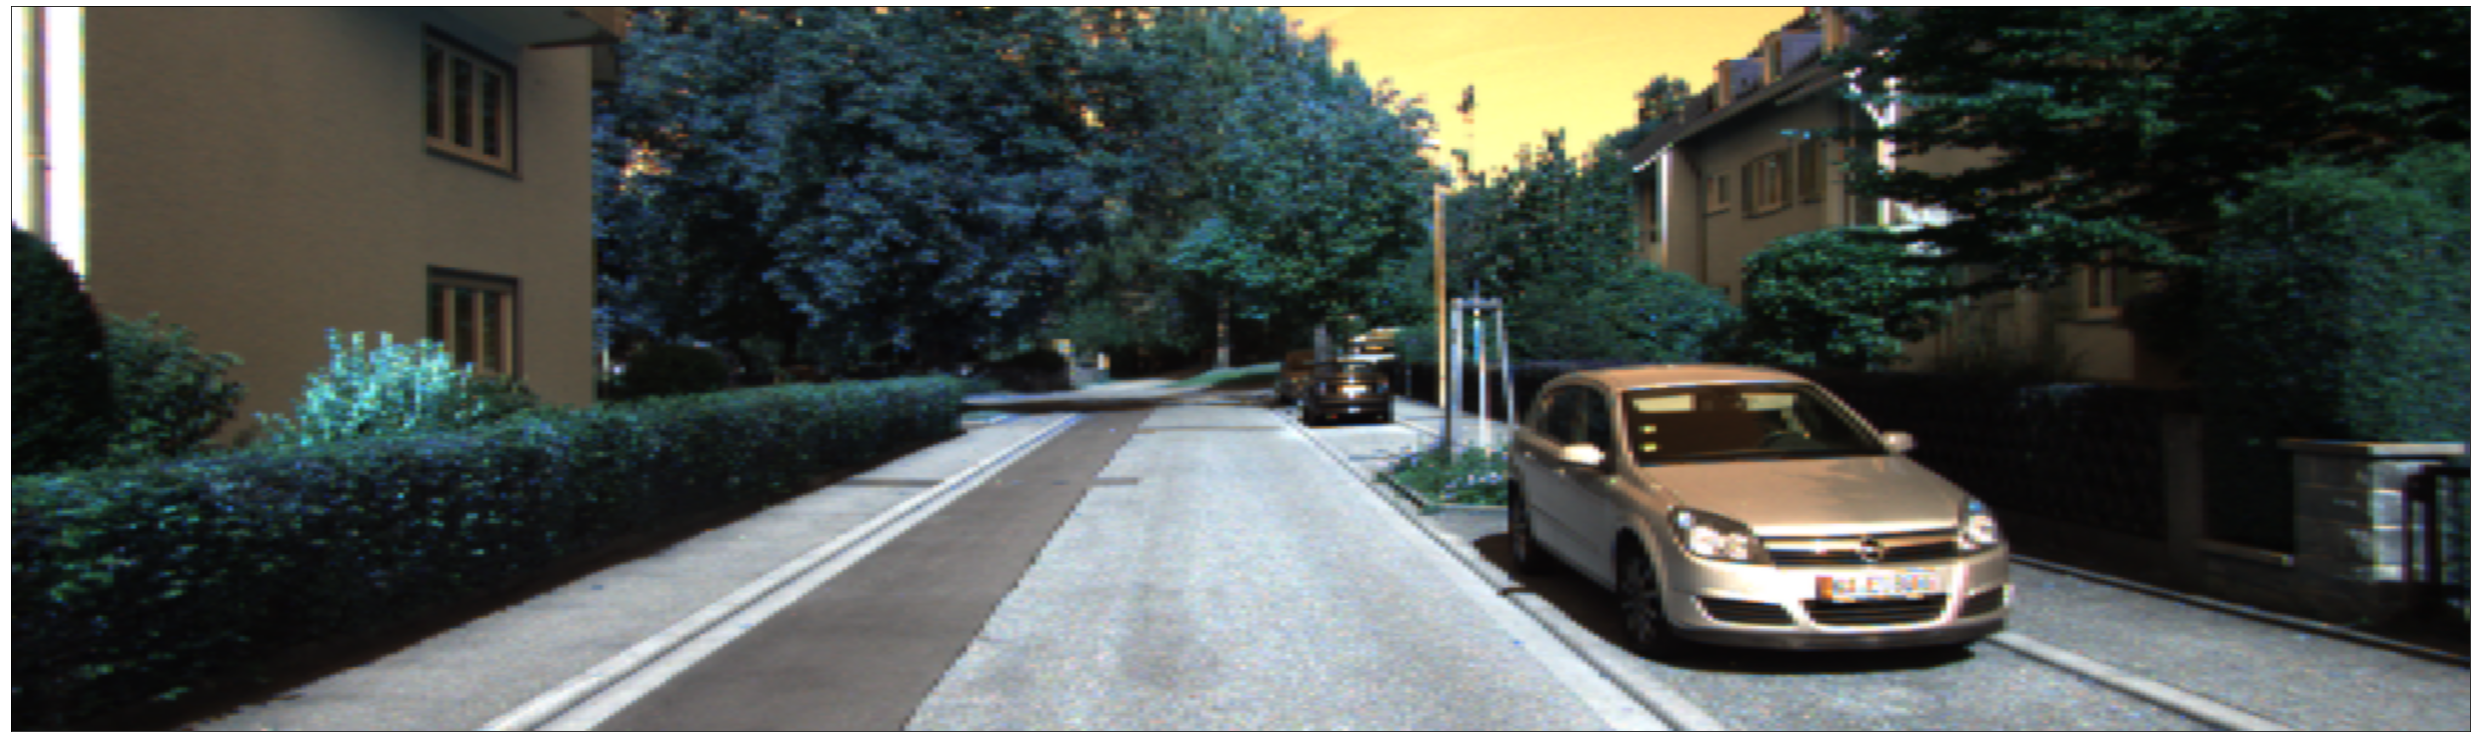

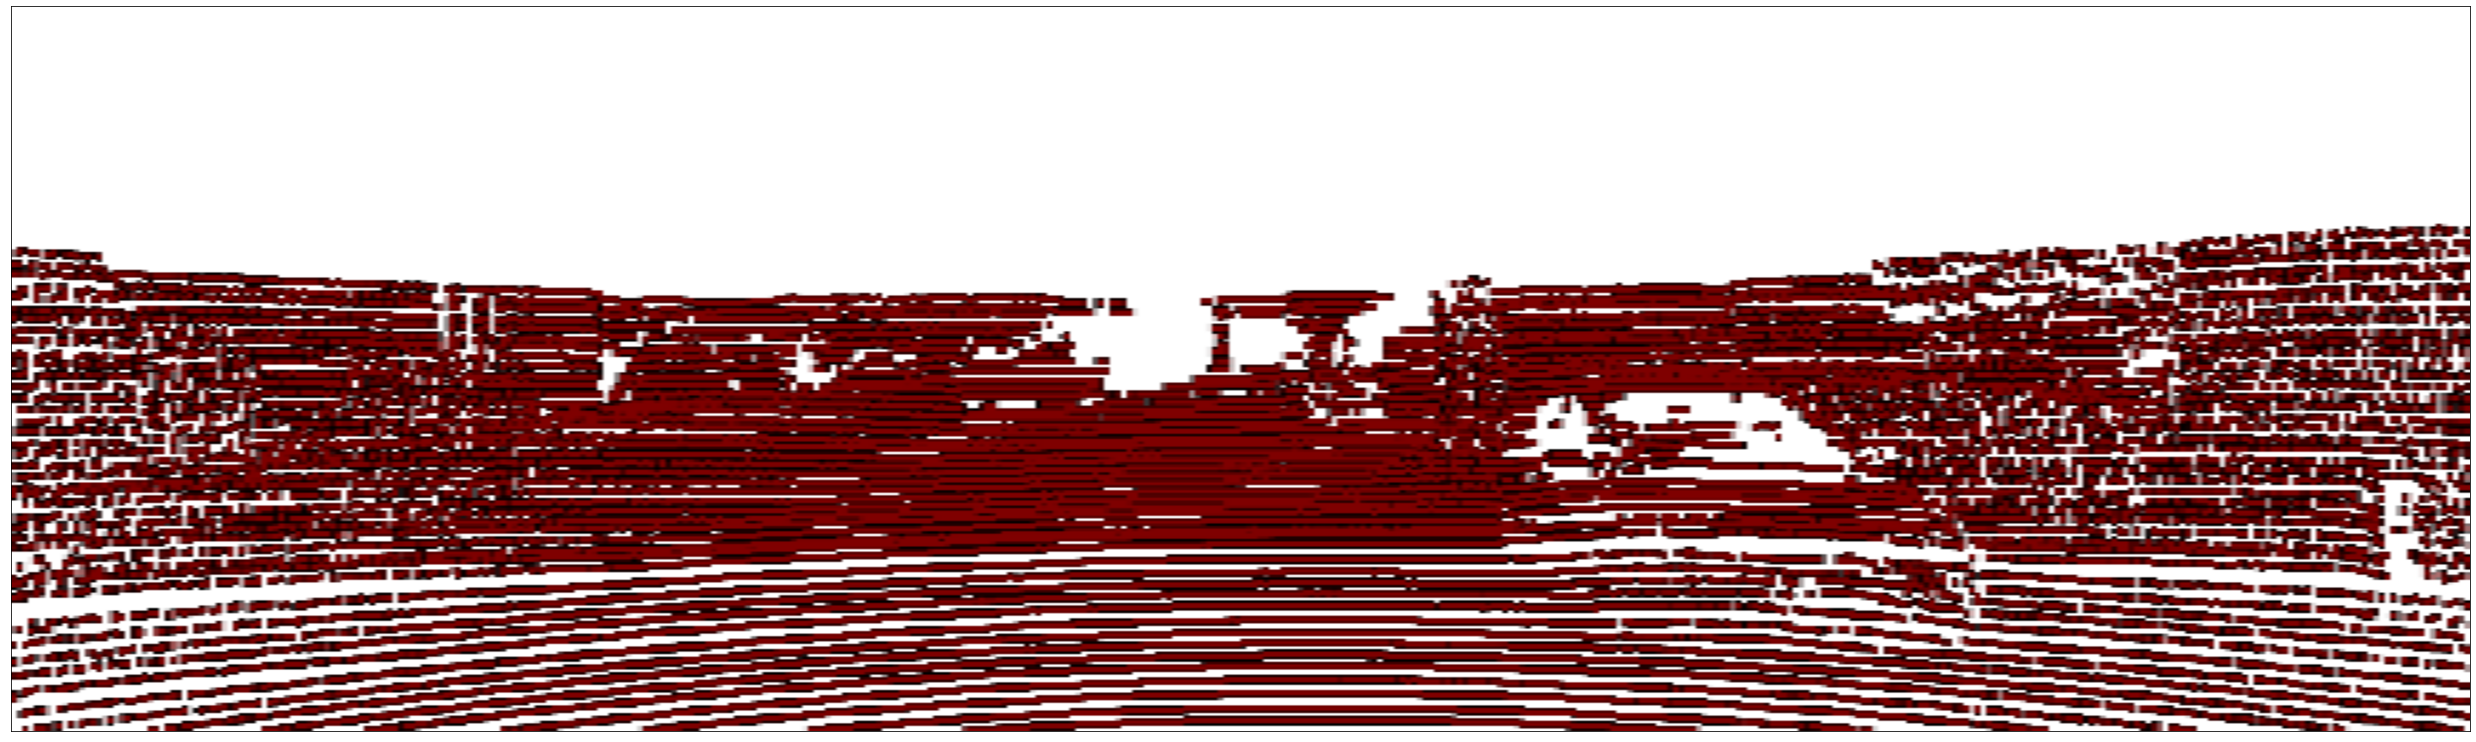

------- print patch height width -------------- 283 432
------- print patch height width -------------- 283 432
sampels_shape torch.Size([1, 3, 256, 512])
queries_shape torch.Size([1, 131072, 2])
----------Decoder_tgt_shape----------------------- torch.Size([131072, 1, 256])
----------Decoder_query_pos_shape----------------- torch.Size([131072, 1, 256])
----------Decoder_memory_shape-------------------- torch.Size([512, 1, 256])
----------Decoder_pos_shape----------------------- torch.Size([512, 1, 256])
----------Decoder_tgt_shape----------------------- torch.Size([131072, 1, 256])
----------Decoder_query_pos_shape----------------- torch.Size([131072, 1, 256])
----------Decoder_memory_shape-------------------- torch.Size([512, 1, 256])
----------Decoder_pos_shape----------------------- torch.Size([512, 1, 256])


/root/work/COTR/COTR/inference/inference_helper.py:52: UserWarning: Spatial smoothness in dense optical flow is lost, but sparse matching and triangulation should be fine
  warnings.warn('Spatial smoothness in dense optical flow is lost, but sparse matching and triangulation should be fine')


----------Decoder_tgt_shape----------------------- torch.Size([131072, 1, 256])
----------Decoder_query_pos_shape----------------- torch.Size([131072, 1, 256])
----------Decoder_memory_shape-------------------- torch.Size([512, 1, 256])
----------Decoder_pos_shape----------------------- torch.Size([512, 1, 256])
----------Decoder_tgt_shape----------------------- torch.Size([131072, 1, 256])
----------Decoder_query_pos_shape----------------- torch.Size([131072, 1, 256])
----------Decoder_memory_shape-------------------- torch.Size([512, 1, 256])
----------Decoder_pos_shape----------------------- torch.Size([512, 1, 256])
----------Decoder_tgt_shape----------------------- torch.Size([131072, 1, 256])
----------Decoder_query_pos_shape----------------- torch.Size([131072, 1, 256])
----------Decoder_memory_shape-------------------- torch.Size([512, 1, 256])
----------Decoder_pos_shape----------------------- torch.Size([512, 1, 256])
----------Decoder_tgt_shape----------------------- torch.S

/root/venv/lib/python3.8/site-packages/torch/nn/functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


sampels_shape torch.Size([1, 3, 256, 512])
queries_shape torch.Size([1, 131072, 2])
----------Decoder_tgt_shape----------------------- torch.Size([131072, 1, 256])
----------Decoder_query_pos_shape----------------- torch.Size([131072, 1, 256])
----------Decoder_memory_shape-------------------- torch.Size([512, 1, 256])
----------Decoder_pos_shape----------------------- torch.Size([512, 1, 256])
----------Decoder_tgt_shape----------------------- torch.Size([131072, 1, 256])
----------Decoder_query_pos_shape----------------- torch.Size([131072, 1, 256])
----------Decoder_memory_shape-------------------- torch.Size([512, 1, 256])
----------Decoder_pos_shape----------------------- torch.Size([512, 1, 256])
----------Decoder_tgt_shape----------------------- torch.Size([131072, 1, 256])
----------Decoder_query_pos_shape----------------- torch.Size([131072, 1, 256])
----------Decoder_memory_shape-------------------- torch.Size([512, 1, 256])
----------Decoder_pos_shape----------------------- 

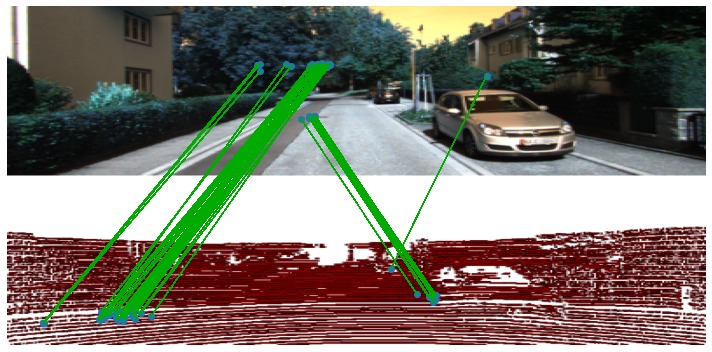

In [6]:
if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    set_COTR_arguments(parser)
    parser.add_argument('--out_dir', type=str, default=general_config['out'], help='out directory')
    parser.add_argument('--load_weights', type=str, default=None, help='load a pretrained set of weights, you need to provide the model id')
    parser.add_argument('--max_corrs', type=int, default=100, help='number of correspondences')
    opt = parser.parse_args(args=[])
    opt.load_weights= 'default'
    opt.max_corrs= 50
    #opt = parser.parse_args()
    opt.command = ' '.join(sys.argv)
    layer_2_channels = {'layer1': 256,
                        'layer2': 512,
                        'layer3': 1024,
                        'layer4': 2048, }
    opt.dim_feedforward = layer_2_channels[opt.layer]
    if opt.load_weights:
        opt.load_weights_path = os.path.join(opt.out_dir, opt.load_weights, 'checkpoint.pth.tar')
    print_opt(opt)
    main(opt)